In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Read in covid data for counties
useable_counties_school_data = pd.read_csv(
    "/Users/mohammadanas/Desktop/Nicks Project/New project/useable_counties_school_data.csv"
)
# Load panel data
covid_data = pd.read_csv(
    "/Users/mohammadanas/Desktop/Nicks Project/New project/county_pop_covid_panel.csv"
)

In [3]:
# List all the data fips counties 
counties_to_use = list(np.unique(useable_counties_school_data["county_fips"]))
# get only relevant counties from panel data
covid_data = covid_data.loc[covid_data["fips"].isin(counties_to_use)].copy()
# get covid rate
covid_data["Covid_Rate"] = covid_data["New_Cases"] / covid_data["TOT_POP"]

Text(0, 0.5, 'Positivity Rate')

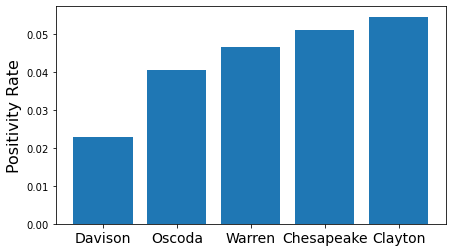

In [4]:
# plot positivity rate for county
plotting_data = covid_data.groupby('fips', as_index=False)['Covid_Rate'].mean()
cplot_data = plotting_data.sort_values(by="Covid_Rate").iloc[[0, 60, 120, 180, 240],:]
counties = ['Davison', 'Oscoda', 'Warren', 'Chesapeake', 'Clayton']
plt.figure(figsize=(7,4))
plt.bar(counties, height=cplot_data['Covid_Rate'])
plt.xticks(fontsize=14)
plt.ylabel('Positivity Rate', fontsize=16)

In [7]:
plotting_data.to_excel("/Users/mohammadanas/Desktop/Nicks Project/New project/county_plotting_data.xlsx")

In [8]:
def weighted_avg(df):
    wa = df['New_Cases'].sum()/df['TOT_POP'].sum()
    return wa

In [9]:
time_data = covid_data.groupby(['Term'], as_index=False).apply(weighted_avg)

In [10]:
time_data.to_excel("/Users/mohammadanas/Desktop/Nicks Project/New project/time_plotting_data.xlsx")

Text(0, 0.5, 'Postivity Rates')

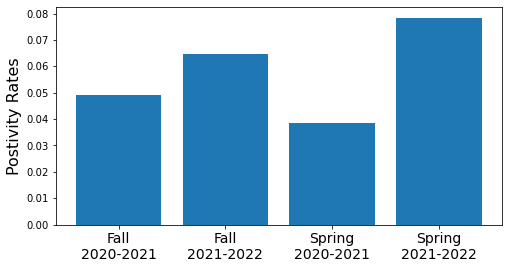

In [57]:
plt.figure(figsize=(8,4))
Terms=['Fall\n2020-2021', 'Fall\n2021-2022', 'Spring\n2020-2021', 'Spring\n2021-2022']
plt.bar(Terms, height=time_data.iloc[:,1])
plt.xticks(fontsize=14)
plt.ylabel("Postivity Rates", fontsize=16)